In [4]:
# Read gisette train data
import pandas as pd
gisette_train_feature_df = pd.read_csv('gisette_train.data', header=None, delim_whitespace=True )
gisette_train_feature_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,...,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


In [18]:
gisette_train_label_df = pd.read_csv('gisette_train.labels', header=None, delim_whitespace=True)
gisette_train_label_df = gisette_train_label_df.iloc[:, 0]
gisette_train_label_df

0       1
1      -1
2       1
3       1
4       1
       ..
5995   -1
5996    1
5997   -1
5998   -1
5999   -1
Name: 0, Length: 6000, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
# Normalize gisette train set 
gisette_train_x = StandardScaler().fit_transform(gisette_train_feature_df)
gisette_train_x 

array([[ 1.54121954, -0.12304076,  0.94149741, ..., -0.13759497,
        -0.41609101,  2.53952425],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       ...,
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076,  2.3929315 , ..., -0.13759497,
        -0.41609101,  2.56402036]])

In [27]:
gisette_train_x.shape

(6000, 5000)

In [28]:
# mean and stand deviation of normalized gisette train data
import numpy as np
np.mean(gisette_train_x), np.std(gisette_train_x)

(-2.17544500931884e-19, 0.9954898291795854)

In [29]:
# generate normalized first two components for visualizetion
from sklearn.decomposition import PCA
pca_gisette=PCA(n_components=2)
pca_gisette_train=pca_gisette.fit_transform(gisette_train_x )
pca_gisette_train_df=pd.DataFrame(data=pca_gisette_train, columns=['pc1', 'pc2'])
pca_gisette_train_df

,pc1,pc2
0,27.930793,6.382022
1,18.516420,-9.880848
2,10.245843,-13.196501
3,11.003072,-3.281596
4,-13.678307,-3.768813
...,...,...
5995,-5.267348,7.004908
5996,-10.807258,1.529228
5997,4.001780,-12.656233
5998,-4.213566,-13.101559


In [26]:
pca_gisette.explained_variance_ratio_ # for the first two component how much variance each can explain

array([0.02883488, 0.02258951])

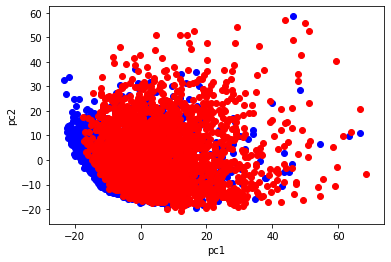

In [17]:
# We pass the dataframe to plot the newly created points in the 2 dimensional feature space. 
# Basically we observe that there is a lot of overlap of points in the 2 dimensional feature space, 
# so the plot seems to be not much interpretable, which indicates the relationship between the instances and classes is not very clear.
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.xlabel('pc1')
plt.ylabel('pc2')
targets = [1, -1]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = gisette_train_label_df == target
    plt.scatter(pca_gisette_train_df.loc[indicesToKeep, 'pc1'],
                pca_gisette_train_df.loc[indicesToKeep, 'pc2'],
                c=color)    

In [30]:
pca_all_gisette_train = PCA().fit(gisette_train_x) #how many components for the train set
evr_gisette_train = pca_all_gisette_train.explained_variance_ratio_ #each components how much variance it explained
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr_gisette_train)))

 0: 0.0288
 1: 0.0226
 2: 0.0166
 3: 0.0162
 4: 0.0124
 5: 0.0114
 6: 0.0102
 7: 0.0088
 8: 0.0072
 9: 0.0069
10: 0.0065
11: 0.0056
12: 0.0052
13: 0.0049
14: 0.0047
15: 0.0044
16: 0.0040
17: 0.0039
18: 0.0037
19: 0.0036
20: 0.0035
21: 0.0033
22: 0.0033
23: 0.0032
24: 0.0029
25: 0.0029
26: 0.0028
27: 0.0027
28: 0.0027
29: 0.0026
30: 0.0025
31: 0.0024
32: 0.0024
33: 0.0023
34: 0.0022
35: 0.0022
36: 0.0021
37: 0.0021
38: 0.0021
39: 0.0020
40: 0.0020
41: 0.0019
42: 0.0019
43: 0.0019
44: 0.0019
45: 0.0018
46: 0.0018
47: 0.0017
48: 0.0017
49: 0.0017
50: 0.0016
51: 0.0016
52: 0.0016
53: 0.0016
54: 0.0016
55: 0.0015
56: 0.0015
57: 0.0015
58: 0.0014
59: 0.0014
60: 0.0014
61: 0.0014
62: 0.0014
63: 0.0014
64: 0.0013
65: 0.0013
66: 0.0013
67: 0.0013
68: 0.0013
69: 0.0013
70: 0.0013
71: 0.0013
72: 0.0012
73: 0.0012
74: 0.0012
75: 0.0012
76: 0.0012
77: 0.0012
78: 0.0011
79: 0.0011
80: 0.0011
81: 0.0011
82: 0.0011
83: 0.0011
84: 0.0011
85: 0.0011
86: 0.0011
87: 0.0010
88: 0.0010
89: 0.0010
90: 0.0010

Text(0.5, 0, 'Number of components')

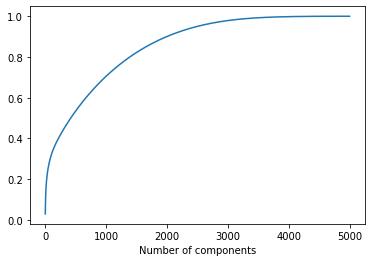

In [31]:
# From the below plot we can see that if we take 2000 dimensions out of 5000, 
# then we are able to retain 90% of the data information. 
# So we can reduce the number of dimensions to 2000 by not loosing much of the information.
plt.plot(np.cumsum(evr_gisette_train))
plt.xlabel('Number of components')

In [32]:
# Read gisette validate set 
gisette_valid_feature_df = pd.read_csv('gisette_valid.data', header=None, delim_whitespace=True )
gisette_valid_feature_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,688,0,0,0,0,0,0,952,0,870,...,0,0,0,0,0,0,494,0,769,0
1,778,758,0,0,0,0,0,708,0,991,...,0,0,0,770,0,0,0,0,0,0
2,469,0,816,0,0,0,0,0,0,0,...,0,0,0,467,0,0,0,417,0,0
3,0,0,0,0,0,571,991,983,0,983,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,949,0,991,...,0,0,0,0,0,0,0,0,976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,511,0,0,0,0,0,0,0,0,...,991,0,0,852,0,0,0,0,0,0
996,0,0,599,0,0,0,0,910,0,0,...,0,0,0,0,0,0,0,0,0,707
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,742
998,0,0,0,0,0,0,0,968,0,0,...,0,0,0,773,0,0,0,0,0,0


In [33]:
# Normalize gisette validate set 
gisette_validate_x = StandardScaler().fit_transform(gisette_valid_feature_df)
gisette_validate_x

array([[ 2.15078851, -0.10731871, -0.52764967, ..., -0.16965916,
         2.32824596, -0.46327712],
       [ 2.48165642,  9.36712572, -0.52764967, ..., -0.16965916,
        -0.39939552, -0.46327712],
       [ 1.34567658, -0.10731871,  1.79905922, ...,  3.3714525 ,
        -0.39939552, -0.46327712],
       ...,
       [-0.3785129 , -0.10731871, -0.52764967, ..., -0.16965916,
        -0.39939552,  1.85123691],
       [-0.3785129 , -0.10731871, -0.52764967, ..., -0.16965916,
        -0.39939552, -0.46327712],
       [-0.3785129 , -0.10731871, -0.52764967, ..., -0.16965916,
        -0.39939552, -0.46327712]])

In [46]:
# generate gisette validate set normalized first two components for visualizetion
pca_gisette_validate = pca_gisette.fit_transform(gisette_validate_x)
pca_gisette_validate_df=pd.DataFrame(data=pca_gisette_validate, columns=['pc1', 'pc2'])
pca_gisette_validate_df


,pc1,pc2
0,-1.080594,-7.158806
1,-8.934733,13.395191
2,2.131049,16.864692
3,-11.076551,-2.763997
4,-13.762747,-4.960047
...,...,...
995,3.255053,-4.377908
996,16.633744,-7.143549
997,-2.803874,13.274110
998,-4.721891,-8.502040


In [47]:
# for the first two component how much variance each can explain for the valid set
pca_gisette.explained_variance_ratio_ 

array([0.03160305, 0.02579088])

In [39]:
# Read gisette test set 
gisette_test_feature_df = pd.read_csv('gisette_test.data', header=None, delim_whitespace=True )
gisette_test_feature_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,983,0,956,0,0,0,0,520,0,0,...,0,0,0,968,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,695,...,960,0,0,687,0,0,0,0,0,0
2,0,0,703,0,0,0,0,0,0,0,...,0,0,0,758,0,0,983,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,987,0,0,0,0,0,498,0,0,0
4,0,0,0,0,0,0,0,980,0,976,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0,0,0,0,0,0,0,773,0,0,...,0,921,0,538,831,0,976,0,769,0
6496,712,0,0,0,0,0,0,976,0,0,...,0,0,0,0,987,0,0,0,0,906
6497,0,0,0,0,0,0,0,0,0,983,...,0,0,0,812,0,0,0,0,0,0
6498,0,0,0,0,0,0,0,0,0,0,...,995,0,0,508,0,0,0,0,991,0


In [40]:
# Normalize gisette test set 
gisette_test_x = StandardScaler().fit_transform(gisette_test_feature_df)
gisette_test_x

array([[ 3.19921749, -0.11587785,  2.3517772 , ..., -0.14788753,
        -0.3980893 , -0.46595813],
       [-0.37631727, -0.11587785, -0.50356769, ..., -0.14788753,
        -0.3980893 , -0.46595813],
       [-0.37631727, -0.11587785,  1.59612631, ..., -0.14788753,
        -0.3980893 , -0.46595813],
       ...,
       [-0.37631727, -0.11587785, -0.50356769, ..., -0.14788753,
        -0.3980893 , -0.46595813],
       [-0.37631727, -0.11587785, -0.50356769, ..., -0.14788753,
         3.05458687, -0.46595813],
       [-0.37631727, -0.11587785, -0.50356769, ..., -0.14788753,
        -0.3980893 , -0.46595813]])

In [43]:
# generate gisette test set normalized first two components for visualizetion
pca_gisette_test = pca_gisette.fit_transform(gisette_test_x)
pca_gisette_test_df=pd.DataFrame(data=pca_gisette_test, columns=['pc1', 'pc2'])
pca_gisette_test_df


,pc1,pc2
0,3.956637,-7.756371
1,10.608825,-5.957776
2,16.619437,19.958030
3,-15.936520,10.979549
4,5.309610,-1.498917
...,...,...
6495,13.060400,-11.590605
6496,16.865632,-9.419362
6497,-9.881505,-3.808356
6498,-4.282969,-2.090393


In [45]:
# for the first two component how much variance each can explain for the test set
pca_gisette.explained_variance_ratio_ 

array([0.02863004, 0.02264792])